In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [73]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
data = pd.read_csv("/content/SMS_train.csv",engine="python",on_bad_lines='skip', encoding='latin1')

In [75]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


# data preprocessing

In [76]:
data["Label"] = np.where(data["Label"]=="Spam",1,0)

In [77]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


In [78]:
data.isnull().sum()

,0
S. No.,0
Message_body,0
Label,0


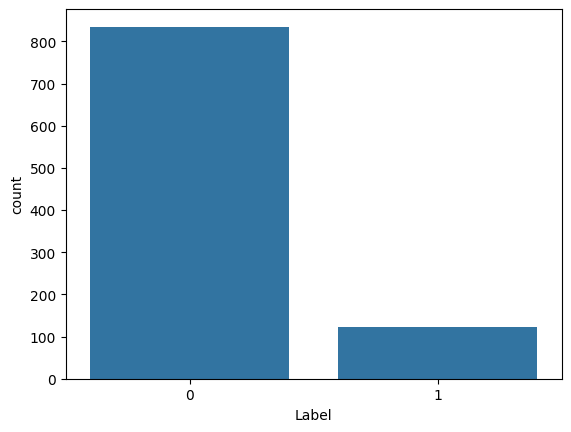

In [79]:
sns.countplot(x =data["Label"])
plt.show()

In [80]:
x = data["Message_body"]
y = data["Label"]

In [81]:
corpus = []
lemmatizer = WordNetLemmatizer()
for i in range(len(x)):
  review = re.sub('[^a-zA-Z]',' ',x[i])
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [82]:
corpus

['rofl true name',
 'guy bitching acted like interested buying something else next week gave u free',
 'pity mood suggestion',
 'b going esplanade fr home',
 'nd time tried contact u u pound prize claim easy call p per minute bt national rate',
 'reminder get pound free call credit detail great offer pls reply text valid name house postcode',
 'huh lei',
 'wait til least wednesday see get',
 'ard like dat lor',
 'ok lor sony ericsson salesman ask shuhui say quite gd use considering',
 'get dump heap mom decided come lowes boring',
 'anything lor juz u lor',
 'next lt gt hour imma flip shit',
 'sorry call later',
 'meant calculation lt gt unit lt gt school really expensive started practicing accent important decided year dental school nmde exam',
 'yes u texted pshew missing much',
 'yeh indian nice tho kane bit shud go drink sometime soon mite hav go da work laugh soon love pete x x',
 'well keep mind got enough gas one round trip barring sudden influx cash',
 'hahaha use brain dear',


# one hot repr

In [83]:
voc_size = 5000
one_hot_repr = [one_hot(word,voc_size) for word in corpus]

In [84]:
one_hot_repr

[[4853, 1419, 7],
 [1480, 795, 4383, 2572, 2650, 462, 4593, 4292, 2286, 2538, 1616, 3636, 4068],
 [1846, 1542, 4679],
 [1625, 211, 2469, 1672, 2260],
 [4799,
  4641,
  4785,
  1832,
  3636,
  3636,
  2107,
  2937,
  2936,
  661,
  1294,
  1122,
  4122,
  1426,
  373,
  860,
  1878],
 [688,
  2446,
  2107,
  4068,
  1294,
  3246,
  3667,
  2718,
  4419,
  4349,
  2682,
  1329,
  595,
  7,
  4949,
  2008],
 [3916, 1817],
 [197, 1853, 100, 120, 3046, 2446],
 [1053, 2572, 3511, 3104],
 [4939, 3104, 2732, 1671, 1788, 1329, 2032, 359, 1786, 21, 974, 899],
 [2446, 895, 4472, 3556, 2420, 2842, 3560, 2041],
 [682, 3104, 3695, 3636, 3104],
 [2286, 2254, 2313, 3167, 908, 4576, 1569],
 [3026, 1294, 2707],
 [1685,
  1795,
  2254,
  2313,
  2753,
  2254,
  2313,
  656,
  2017,
  2784,
  2949,
  3498,
  1247,
  3585,
  2420,
  217,
  2979,
  656,
  857,
  1231],
 [330, 3636, 1569, 2459, 4236, 691],
 [4147,
  3976,
  3939,
  1076,
  1502,
  4133,
  2668,
  2764,
  3905,
  1704,
  2683,
  4820,
  1598,

# Padding

In [85]:
sent_len = 0
for i in one_hot_repr:
  if len(i)>sent_len:
    sent_len = len(i)

In [86]:
embedded_docs = pad_sequences(one_hot_repr,padding="pre",maxlen=sent_len)

In [87]:
embedded_docs

array([[   0,    0,    0, ..., 4853, 1419,    7],
       [   0,    0,    0, ..., 1616, 3636, 4068],
       [   0,    0,    0, ..., 1846, 1542, 4679],
       ...,
       [   0,    0,    0, ..., 3126, 3425, 3456],
       [   0,    0,    0, ..., 2719, 4641, 4801],
       [   0,    0,    0, ...,    0, 4098, 3211]], dtype=int32)

In [88]:
x,y = SMOTE().fit_resample(embedded_docs,y)

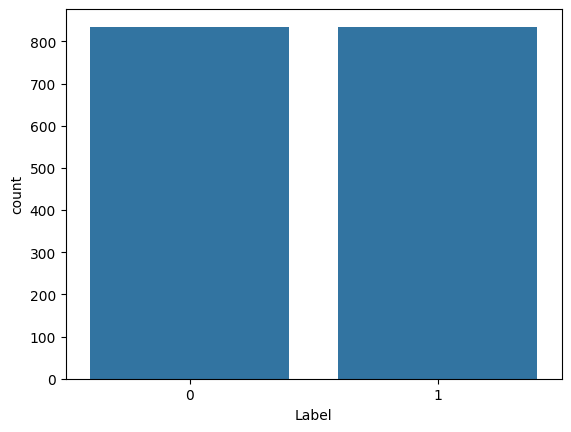

In [89]:
sns.countplot(x = y)
plt.show()

# Bidirectional lstm rnn

In [108]:
embedded_vector = 40
model = Sequential()
model.add(Embedding(voc_size,embedded_vector,input_length=sent_len))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,"sigmoid"))
model.compile("adam","binary_crossentropy",metrics=["accuracy"])

In [109]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
x = np.array(x)
y = np.array(y)

# train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.5339 - loss: 0.6709 - val_accuracy: 0.8323 - val_loss: 0.4251
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8230 - loss: 0.4077 - val_accuracy: 0.8623 - val_loss: 0.3146
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8920 - loss: 0.2584 - val_accuracy: 0.9102 - val_loss: 0.2028
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9642 - loss: 0.1176 - val_accuracy: 0.9431 - val_loss: 0.1397
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9868 - loss: 0.0550 - val_accuracy: 0.9671 - val_loss: 0.1038
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9929 - loss: 0.0409 - val_accuracy: 0.9701 - val_loss: 0.0869
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9950 - loss: 0.0235 - val_accuracy: 0.9491 - val_loss: 0.1394
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9888 - loss: 0.0402 - val_accuracy: 0.9760 - v

In [111]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 64, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 40)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 200)                 │         112,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 939,005 (3.58 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 626,004 (2.39 MB)

In [112]:
pred = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [113]:
accuracy_score(y_test,pred.round())

0.9700598802395209

In [114]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       172
           1       0.96      0.98      0.97       162

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334

